tensor([[1.0948, 6.3656],
        [6.3656, 4.9421]], dtype=torch.float64) tensor([[0.8327, 0.3252],
        [0.3252, 0.7000]], dtype=torch.float64)


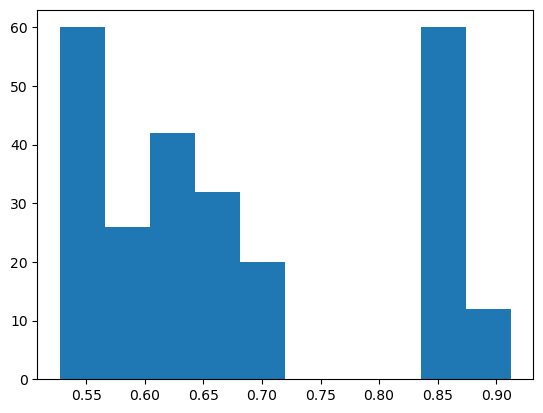

{'1_1': [tensor(0.6444, dtype=torch.float64), tensor(0.5348, dtype=torch.float64), tensor(0.6184, dtype=torch.float64), tensor(0.5318, dtype=torch.float64), tensor(0.6526, dtype=torch.float64), tensor(0.5966, dtype=torch.float64), tensor(0.5286, dtype=torch.float64), tensor(0.5330, dtype=torch.float64), tensor(0.6247, dtype=torch.float64), tensor(0.8553, dtype=torch.float64), tensor(0.6803, dtype=torch.float64), tensor(0.8411, dtype=torch.float64), tensor(0.8455, dtype=torch.float64), tensor(0.6897, dtype=torch.float64), tensor(0.8483, dtype=torch.float64), tensor(0.5278, dtype=torch.float64), tensor(0.6738, dtype=torch.float64), tensor(0.6053, dtype=torch.float64), tensor(0.6017, dtype=torch.float64), tensor(0.9126, dtype=torch.float64), tensor(0.8570, dtype=torch.float64), tensor(0.6444, dtype=torch.float64), tensor(0.5348, dtype=torch.float64), tensor(0.6184, dtype=torch.float64), tensor(0.5318, dtype=torch.float64), tensor(0.6526, dtype=torch.float64), tensor(0.5966, dtype=torch.fl

In [32]:
import sys
import os
sys.path.append("..")
from geomatry.opt_Energy_approximated.optimizer import MultipleSystemOptimizer
from geomatry.opt.loss import rmsd_loss
from geomatry.ff.graph import get_given_graph_builder
from geomatry.ff.springs import SpringFF, _random_spring_systems, _random_spring_ff_param
from geomatry.ff.NN import NNPotentialFF, _random_nn_systems, _random_nn_ff_param
import torch
import copy

def onlyRsquare(k_perturbed, r0_perturbed, optimizer):
    ff.reset_parameters(k_perturbed, r0_perturbed)
    params_0 = ff.state_dict()
    print("params_optimized",optimizer.optimize(params_0))
    print("params_answer",k, r0)
    return copy.deepcopy(params_0)

import copy

systemN = 6
N = 7
N_pairs = 21
max_Za = 1
Ras, Zas, idx_is, idx_js = _random_nn_systems(systemN, N, N_pairs, max_Za, start_Za=1)
params = _random_nn_ff_param(max_Za)
ff = NNPotentialFF(max_Za)
ff.reset_parameters(params)

fixed_atom_indices = [0]
graph_builders = [get_given_graph_builder(idx_i, idx_j) for idx_i, idx_j in zip(idx_is, idx_js)]


k, r0 = _random_spring_ff_param(max_Za,k_max=10,r0_max=2)
r0[1,1] = 0.7
print(k, r0)
ff_spring = SpringFF(max_Za)
ff_spring.reset_parameters(k, r0)
import copy
params_spring = copy.deepcopy(ff_spring.state_dict())
optimizer_spring = MultipleSystemOptimizer(
    Ras, Zas, graph_builders, ff_spring, rmsd_loss, 
    params_star=params_spring,
    fixed_atom_indices=fixed_atom_indices,
    fmax=1e-5, reoptimize=True
)
e_size=0.06

optimizer = MultipleSystemOptimizer(
    optimizer_spring.Ra_stars, Zas, graph_builders, ff, rmsd_loss, 
    params_star=params,
    fixed_atom_indices=fixed_atom_indices,
    fmax=1e-5, reoptimize=False
)
optimizer_Energy = optimizer

optimizer.ff.changeParamByInputDistribution(e_size,optimizer_spring.Ra_stars,Zas,graph_builders)
params=copy.deepcopy(optimizer.ff.state_dict())
#print('start', params_0)
#print('goal',params_star)


In [33]:
print(optimizer_Energy.Ra_stars)

[tensor([[-0.0802,  0.3348, -0.0991],
        [-0.0746, -0.1420, -0.3413],
        [-0.6224,  0.0372, -0.1003],
        [-0.2199,  0.2470,  0.4065],
        [ 0.2048, -0.1451,  0.2393],
        [-0.4586, -0.2237,  0.4106],
        [-0.2338, -0.4999,  0.0200]], dtype=torch.float64), tensor([[-0.8919,  0.1291, -0.1232],
        [-0.4967,  0.2947, -0.4313],
        [-0.8181,  0.3690,  0.3424],
        [-0.3964, -0.1017,  0.1153],
        [-0.6214,  0.7618, -0.0756],
        [-0.0868,  0.3834, -0.1049],
        [-0.2933,  0.4557,  0.3830]], dtype=torch.float64), tensor([[ 1.5269,  0.5773,  0.1887],
        [ 1.3225,  0.4258,  0.7358],
        [ 1.3918, -0.0324,  0.4825],
        [ 0.9497,  0.6897,  0.4621],
        [ 0.8076,  0.0846,  0.4584],
        [ 0.9241,  0.4620, -0.0214],
        [ 1.2826,  0.0685, -0.0243]], dtype=torch.float64), tensor([[ 0.0444,  0.7406,  0.0055],
        [-0.1875,  0.0703, -0.4481],
        [ 0.2423, -0.0748, -0.1728],
        [ 0.2350,  0.4894, -0.5158],
     

In [34]:
print(ff.state_dict().keys())
print(ff.nets['0_0'].state_dict().keys())


odict_keys(['nets.0_0.net.0.weight', 'nets.0_0.net.0.bias', 'nets.0_0.net.2.weight', 'nets.0_0.net.2.bias', 'nets.0_0.net.4.weight', 'nets.0_0.net.4.bias', 'nets.0_1.net.0.weight', 'nets.0_1.net.0.bias', 'nets.0_1.net.2.weight', 'nets.0_1.net.2.bias', 'nets.0_1.net.4.weight', 'nets.0_1.net.4.bias', 'nets.1_1.net.0.weight', 'nets.1_1.net.0.bias', 'nets.1_1.net.2.weight', 'nets.1_1.net.2.bias', 'nets.1_1.net.4.weight', 'nets.1_1.net.4.bias'])
odict_keys(['net.0.weight', 'net.0.bias', 'net.2.weight', 'net.2.bias', 'net.4.weight', 'net.4.bias'])


nan
Ra_star_energy tensor(0.8593, dtype=torch.float64, grad_fn=<DivBackward0>)


/var/folders/d9/j9pnzj2s30jf7r3wxfwp0yz80000gn/T/ipykernel_89356/17311721.py:18: RuntimeWarning: invalid value encountered in divide
  return direction/np.linalg.norm(direction)
/var/folders/d9/j9pnzj2s30jf7r3wxfwp0yz80000gn/T/ipykernel_89356/17311721.py:32: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Ra_temp[:,:]+=x[i]*n1
/var/folders/d9/j9pnzj2s30jf7r3wxfwp0yz80000gn/T/ipykernel_89356/17311721.py:35: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Ra_temp[:,:]-=x[i]*n1


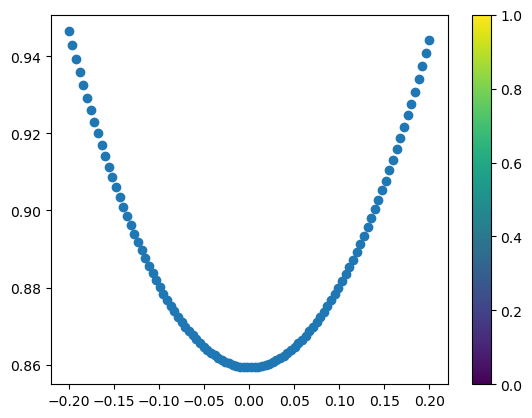

In [35]:
#Draw energy landscape near real optimal geometry
#In direction towards current local minimum
from torch import FloatTensor, IntTensor
from ase import Atoms
import numpy as np
import matplotlib.pyplot as plt

def get_ase_atoms(Ra: FloatTensor, Za: IntTensor) -> Atoms:
    return Atoms(
        positions=Ra.detach().cpu().numpy(),
        numbers=Za.detach().cpu().numpy()
    )

def getMaxDirection(optimizer, params_0, index):
    Ra_star_0=optimizer.fitting._get_Ra_star(params_0,optimizer.graph_builders[index],optimizer.Ra_stars[index],optimizer.Zas[index],optimizer.fixed_atom_indices)
    direction=(Ra_star_0-optimizer.Ra_stars[index]).detach().numpy()
    direction[fixed_atom_indices,:]=0
    return direction/np.linalg.norm(direction)

def drawGraphs(optimizer,params, index):
    n1=getMaxDirection(optimizer,params, index)
    if (np.isnan(n1[0,0])):
        print('nan')
        n1=np.zeros(n1.shape)
        n1[-1,0]=1
    optimizer.ff.reset_parameters(params['k'],params['r0'])
    Ra_temp=copy.deepcopy(optimizer.Ra_stars[index])
    atoms=get_ase_atoms(Ra_temp, optimizer.Zas[index])
    x=np.linspace(-0.2,0.2,100)
    z1=copy.deepcopy(x)
    for i in range(100):
        Ra_temp[:,:]+=x[i]*n1
        E0=optimizer.ff.get_E(Ra_temp,optimizer.Zas[index],*optimizer.graph_builders[index](atoms))
        z1[i]=E0
        Ra_temp[:,:]-=x[i]*n1
    #z1[z1>30]=30
    print('Ra_star_energy',optimizer.ff.get_E(Ra_temp,optimizer.Zas[index],*optimizer.graph_builders[index](atoms)))
    plt.scatter(x,z1)
    plt.colorbar()
drawGraphs(optimizer_spring,params_spring,0)

tensor([ 0.7543,  0.1928,  0.1064,  0.2191, -0.0253, -0.8196,  0.0204, -0.4038,
         0.5242,  0.6386], dtype=torch.float64)
params_0 odict_keys(['nets.0_0.net.0.weight', 'nets.0_0.net.0.bias', 'nets.0_0.net.2.weight', 'nets.0_0.net.2.bias', 'nets.0_0.net.4.weight', 'nets.0_0.net.4.bias', 'nets.0_1.net.0.weight', 'nets.0_1.net.0.bias', 'nets.0_1.net.2.weight', 'nets.0_1.net.2.bias', 'nets.0_1.net.4.weight', 'nets.0_1.net.4.bias', 'nets.1_1.net.0.weight', 'nets.1_1.net.0.bias', 'nets.1_1.net.2.weight', 'nets.1_1.net.2.bias', 'nets.1_1.net.4.weight', 'nets.1_1.net.4.bias'])


  0%|          | 0/8001 [00:00<?, ?it/s]

0 curvature tensor(-2.0752, dtype=torch.float64, grad_fn=<DivBackward0>) 289.0508614610015 distance -4.913770242083096 loss 867.2294836464728
trueloss 867.2294836464728
loss 867.2294836464728
tensor([-3.8225, -2.1464, -1.9446, -2.2763, -2.9497, -3.4998, -2.7924, -1.9945,
        -2.6803, -2.6747], dtype=torch.float64, grad_fn=<SubBackward0>)


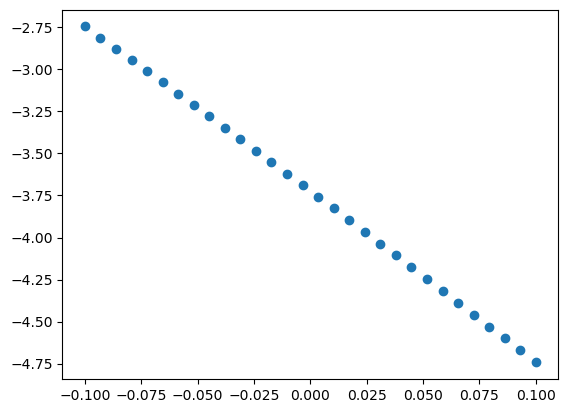

 25%|██▍       | 2000/8001 [04:25<13:09,  7.60it/s]

2000 curvature tensor(1.3718, dtype=torch.float64, grad_fn=<DivBackward0>) 0.18395874371446852 distance 0.003392662290206248 loss 0.685587891009597
trueloss 0.685587891009597
loss 0.685587891009597
tensor([0.1499, 0.1346, 0.1042, 0.0959, 0.1082, 0.1664, 0.0692, 0.1258, 0.1567,
        0.1282], dtype=torch.float64, grad_fn=<SubBackward0>)


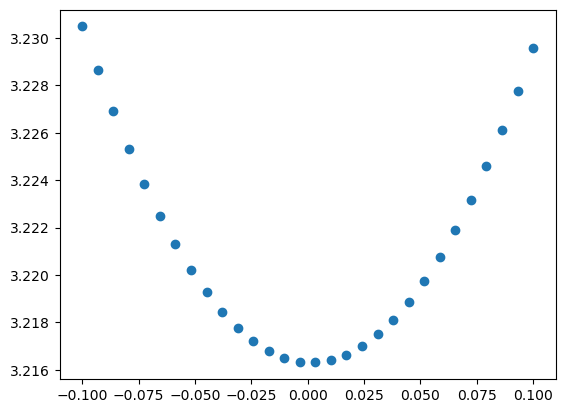

 50%|████▉     | 4000/8001 [08:45<09:00,  7.41it/s]

4000 curvature tensor(3.6688, dtype=torch.float64, grad_fn=<DivBackward0>) 0.021921235291976263 distance 0.0072118886272004275 loss 0.17008605103042873
trueloss 0.17008605103042873
loss 0.17008605103042873
tensor([0.2741, 0.1163, 0.3716, 0.1148, 0.1472, 0.1928, 0.2678, 0.2566, 0.3622,
        0.2889], dtype=torch.float64, grad_fn=<SubBackward0>)


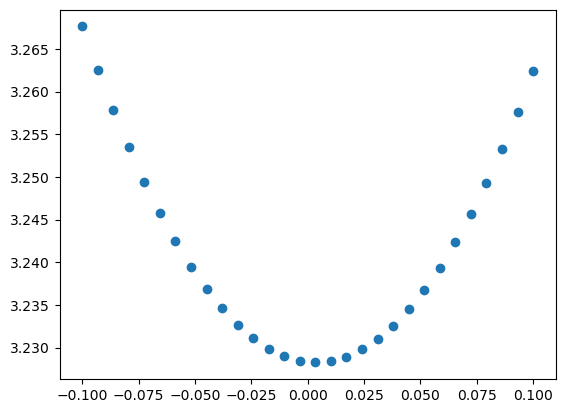

 75%|███████▍  | 6000/8001 [13:04<04:19,  7.70it/s]

6000 curvature tensor(11.5230, dtype=torch.float64, grad_fn=<DivBackward0>) 0.00015834361252459008 distance 0.003031090986374143 loss 0.0014127667837206647
trueloss 0.0014127667837206647
loss 0.0014127667837206647
tensor([1.2607, 1.0331, 0.8253, 1.0047, 1.0702, 1.0028, 1.0105, 1.0659, 1.4712,
        0.5373], dtype=torch.float64, grad_fn=<SubBackward0>)


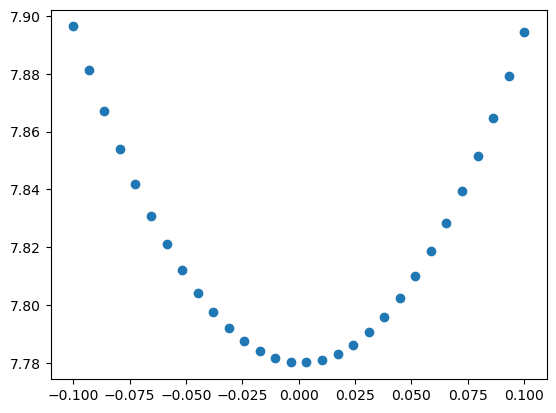

100%|█████████▉| 8000/8001 [17:22<00:00,  7.93it/s]

8000 curvature tensor(18.4202, dtype=torch.float64, grad_fn=<DivBackward0>) 0.002029096235337436 distance 0.0051981893402644665 loss 0.006330149156873549
trueloss 0.006330149156873549
loss 0.006330149156873549
tensor([1.1507, 2.0096, 0.6888, 0.7851, 0.6905, 0.9232, 1.6827, 1.8823, 0.8705,
        1.9950], dtype=torch.float64, grad_fn=<SubBackward0>)


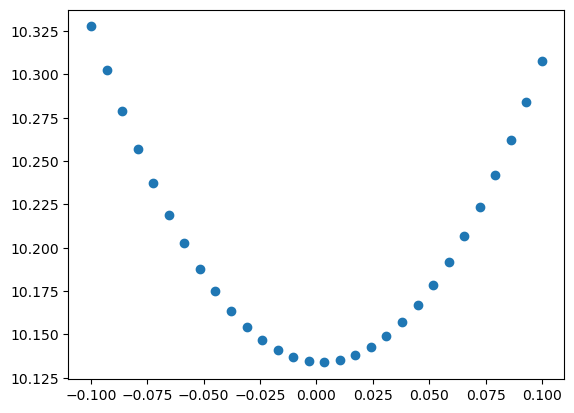

100%|██████████| 8001/8001 [17:22<00:00,  7.67it/s]


In [36]:
def energyAndRsquare(params, optimizer):
    ff.reset_parameters(params)
    params_0 = ff.state_dict()
    print("params_0", params_0.keys())
    for i in range(1):
        params_0=optimizer.optimize(params_0, 8001, 2000, e_size, 10, 2)
    return params_0
print(params['nets.1_1.net.0.bias'])
new_params_0=energyAndRsquare(params, optimizer)


0.6972769003406527


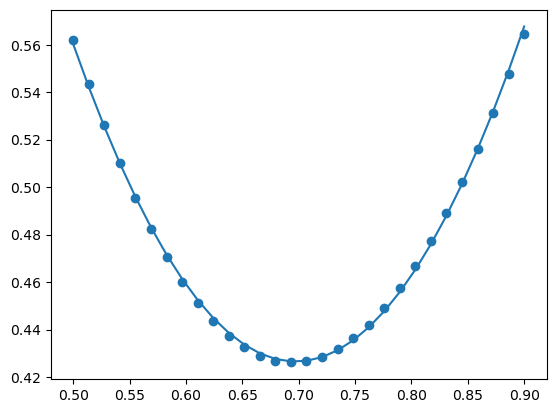

In [37]:
import matplotlib.pyplot as plt
import scipy

optimizer_Energy.ff.reset_parameters(new_params_0)
x=torch.linspace(0.5,0.9,30,dtype=torch.float64)
y=optimizer_Energy.ff.nets['1_1'](x)
coeff=np.polyfit(x.detach().numpy(),y.detach().numpy(),deg=2)
print(-coeff[1]/2/coeff[0])
plt.scatter(x.detach().numpy(),y.detach().numpy())
plt.plot(x.detach().numpy(),(coeff[0]*(x**2)+coeff[1]*x+coeff[2]).detach().numpy())